Tugas 1

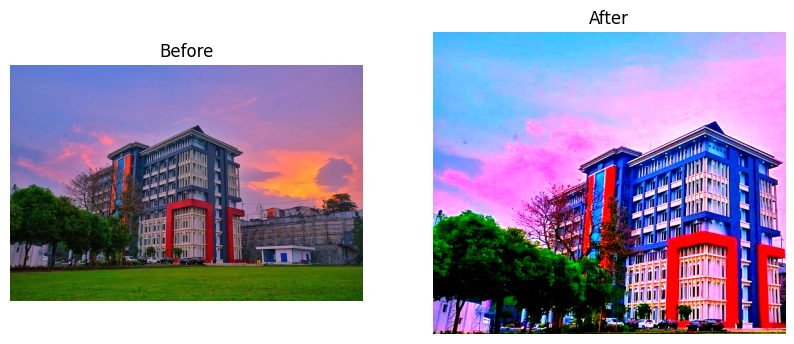

In [55]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from PIL import Image, ImageEnhance
import numpy as np

# Membaca gambar
GKB4 = Image.open('GKB4.jpg')  # Pastikan formatnya kompatibel dengan Pillow

# Plot Before
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(GKB4)
plt.axis('off')
plt.title('Before')

# Mengubah Saturasi
enhancer_color = ImageEnhance.Color(GKB4)
GKB4_colored = enhancer_color.enhance(2.1)  # Tingkat saturasi (2x lebih cerah)

# Mengubah Kontras
enhancer_contrast = ImageEnhance.Contrast(GKB4_colored)
GKB4_contrasted = enhancer_contrast.enhance(1.5)  # Kontras lebih tinggi

# Crop untuk Zoom (Atur area yang ingin diperbesar)
width, height = GKB4_contrasted.size
left = 0  # Bagian kiri
top = 0 # Bagian atas
right = 3 * width // 4.5  # Bagian kanan
bottom = 3 * height // 3.5  # Bagian bawah
GKB4_zoomed = GKB4_contrasted.crop((left, top, right, bottom))

enhancer_brightness = ImageEnhance.Brightness(GKB4_zoomed)
GKB4_bright = enhancer_brightness.enhance(1.5)

# Plot After
plt.subplot(1, 2, 2)
plt.imshow(GKB4_bright)
plt.axis('off')
plt.title('After')

# Tampilkan hasil
plt.show()


Tugas 2


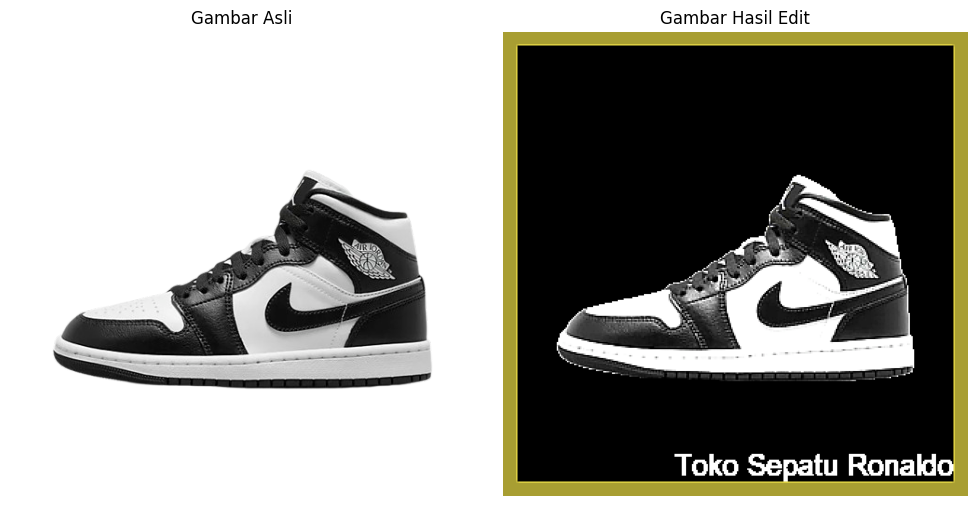

In [66]:
import os
from PIL import Image, ImageEnhance, ImageOps, ImageDraw, ImageFont
import matplotlib.pyplot as plt

# Fungsi untuk meningkatkan kecerahan gambar
def enhance_brightness(image, factor=1.5):
    enhancer = ImageEnhance.Brightness(image)
    return enhancer.enhance(factor)

# Fungsi untuk mengubah ukuran gambar menjadi 300x300 pixel
def resize_image(image, size=(300, 300)):
    return image.resize(size)

# Fungsi untuk menambahkan border ke gambar
def add_border(image, border_size=10, border_color=(168, 158, 50)):
    return ImageOps.expand(image, border=border_size, fill=border_color)

# Fungsi untuk meningkatkan ketajaman gambar
def enhance_sharpness(image, factor=2.5):
    enhancer = ImageEnhance.Sharpness(image)
    return enhancer.enhance(factor)

# Fungsi untuk mengubah gambar menjadi grayscale
def convert_to_grayscale(image):
    return image.convert("RGB").convert("L").convert("RGB")  # Keeping RGB format

def add_watermark(image, text="Toko Sepatu Ronaldo", font_size=20):
    # Tambahkan watermark di sudut kanan bawah
    watermark = image.copy()
    draw = ImageDraw.Draw(watermark)
    
    try:
        # Coba untuk menggunakan font TrueType
        font = ImageFont.truetype("arial.ttf", font_size)
    except IOError:
        # Gunakan font default jika tidak ditemukan
        font = ImageFont.load_default()
    
    # Dapatkan ukuran teks menggunakan `textbbox`
    text_bbox = draw.textbbox((0, 0), text, font=font)
    text_width, text_height = text_bbox[2], text_bbox[3]
    
    # Posisi watermark di sudut kanan bawah
    x = watermark.width - text_width - 10
    y = watermark.height - text_height - 10
    
    # Tambahkan teks ke gambar
    draw.text((x, y), text, fill=(255, 255, 255), font=font)
    return watermark


# Fungsi utama untuk memproses gambar
def process_image(image_path, save_path, grayscale=False, watermark=True):
    # Buka gambar
    original_image = Image.open(image_path)
    
    # Langkah-langkah pengeditan
    edited_image = enhance_brightness(original_image, factor=1.5)  # 1. Tingkatkan kecerahan
    edited_image = resize_image(edited_image, size=(300, 300))  # 2. Ubah ukuran ke 300x300
    edited_image = add_border(edited_image, border_size=10, border_color=(168, 158, 50))  # 3. Tambahkan border
    edited_image = enhance_sharpness(edited_image, factor=2.5)  # 4. Tingkatkan ketajaman
    
    # 5. Ubah ke grayscale jika diperlukan
    if grayscale:
        edited_image = convert_to_grayscale(edited_image)
    
    # 6. Tambahkan watermark jika diperlukan
    if watermark:
        edited_image = add_watermark(edited_image, text="Toko Sepatu Ronaldo")
    
    # Pastikan gambar dalam mode RGB sebelum disimpan sebagai JPEG
    if edited_image.mode == "RGBA":
        edited_image = edited_image.convert("RGB")
    
    # 7. Simpan gambar hasil edit
    edited_image.save(save_path, format="JPEG")

    # Kembalikan gambar asli dan hasil edit untuk perbandingan
    return original_image, edited_image

# Fungsi untuk menampilkan perbandingan gambar asli dan hasil edit
def show_comparison(original_image, edited_image):
    plt.figure(figsize=(10, 5))
    
    # Gambar asli
    plt.subplot(1, 2, 1)
    plt.imshow(original_image)
    plt.axis("off")
    plt.title("Gambar Asli")
    
    # Gambar hasil edit
    plt.subplot(1, 2, 2)
    plt.imshow(edited_image)
    plt.axis("off")
    plt.title("Gambar Hasil Edit")
    
    plt.tight_layout()
    plt.show()

# Contoh penggunaan
if __name__ == "__main__":
    input_path = "img/airjordan.png"  # Ganti dengan path gambar Anda
    output_path = "sepatu_edited.jpg"
    
    # Proses gambar
    original, edited = process_image(input_path, output_path, grayscale=False, watermark=True)
    
    # Tampilkan perbandingan
    show_comparison(original, edited)
